## Clustering Using Iris Dataset

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [112]:
#loading the iris dataset
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [113]:
iris.data #features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [114]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
#create dataframe
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

#Add the target variable 'species' to the DataFrame
df['class']=iris.target

#Display DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Exploration

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [117]:
df.shape

(150, 5)

In [118]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [119]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [120]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [121]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [122]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

### Data Preprocessing

In [123]:
df.duplicated().sum()

1

In [124]:
#dropping duplicates
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [125]:
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [126]:
df['class'].unique()

array([0, 1, 2])

In [127]:
df.groupby('class').size()

class
0    50
1    50
2    50
dtype: int64

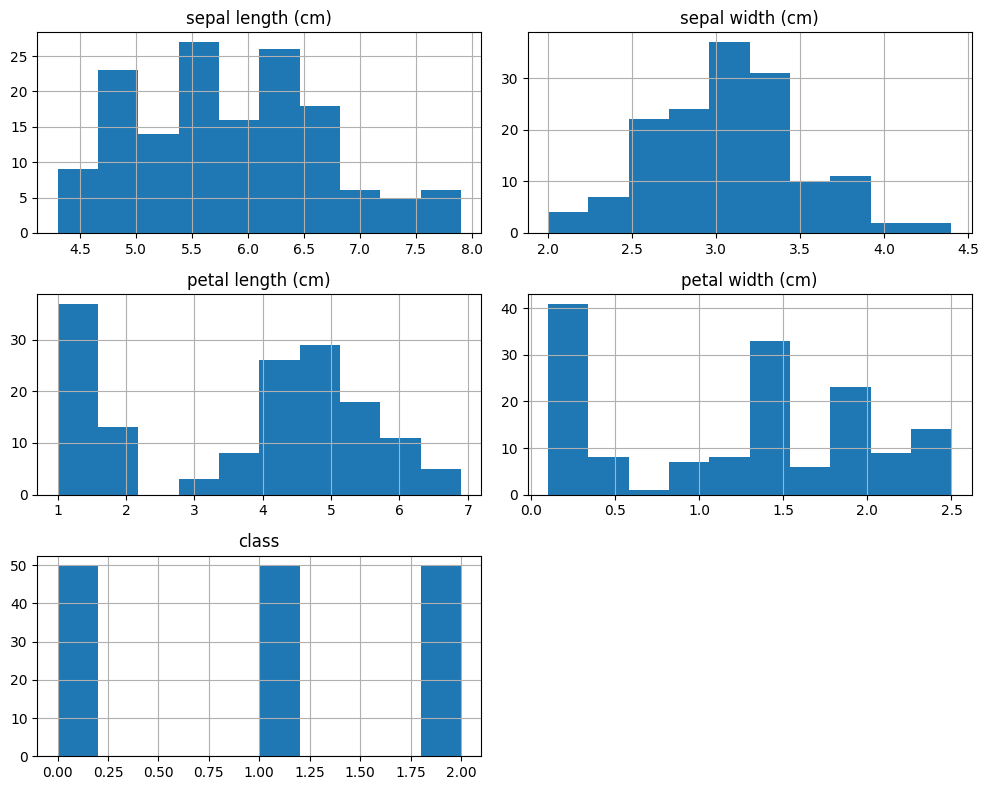

In [128]:
#plotting histogram for each feature
df.hist(figsize=(10,8))
plt.tight_layout()# this is done to prevent layout overlap
plt.show()

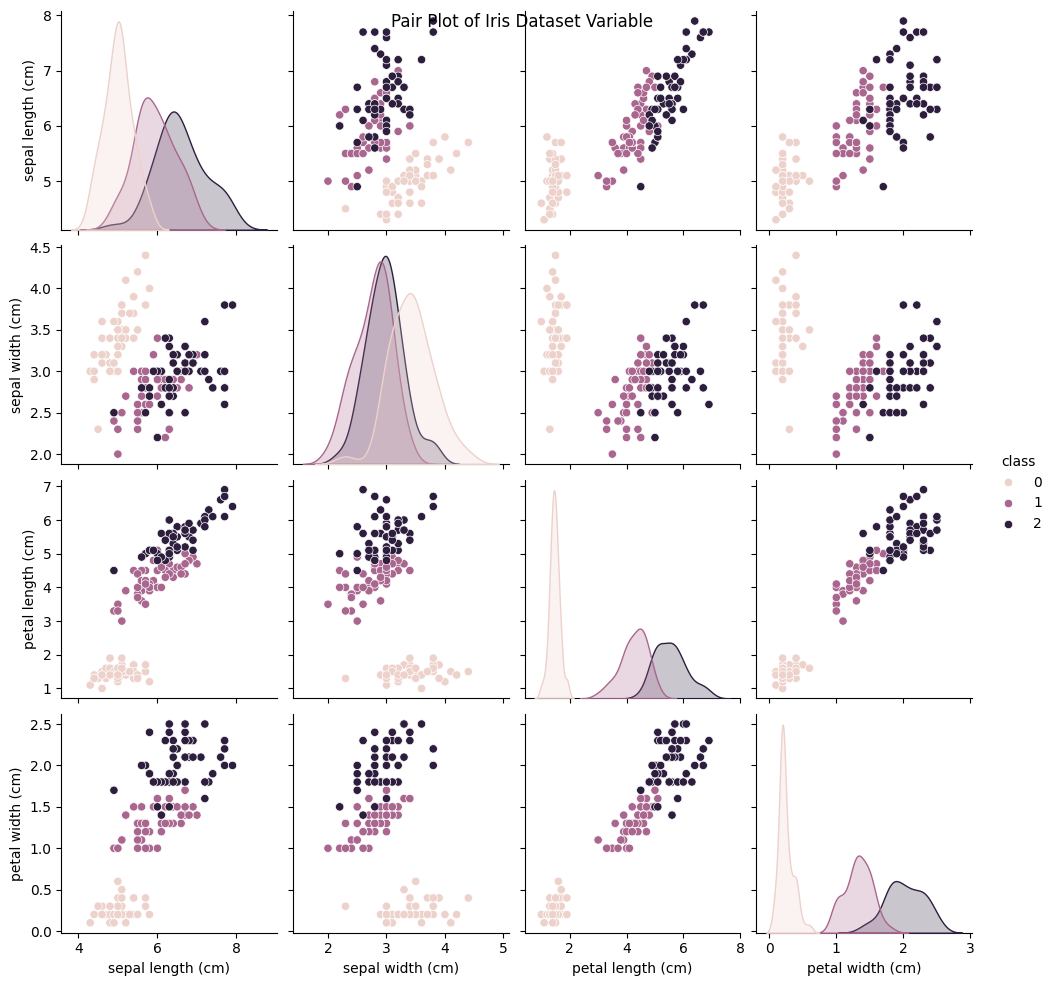

In [129]:
sns.pairplot(df,hue='class')
plt.suptitle('Pair Plot of Iris Dataset Variable')
plt.show()

#### This provides a visual overview of the relationships between different pairs of variables (features) in the Iris dataset. Each scatterplot shows the relationship between two variables, and the color of the data points indicates the species of the iris flower.

In [130]:
colm_name=df.select_dtypes('float64').columns
colm_name

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

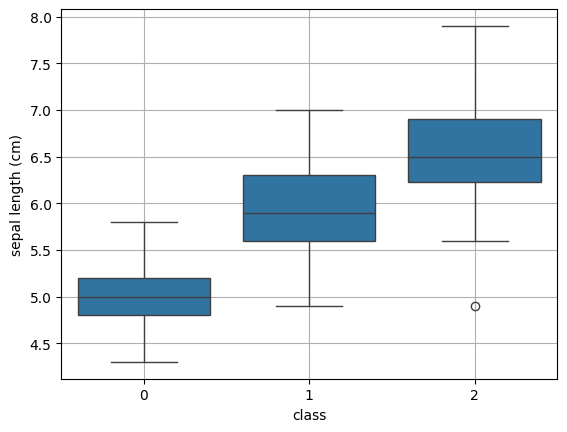

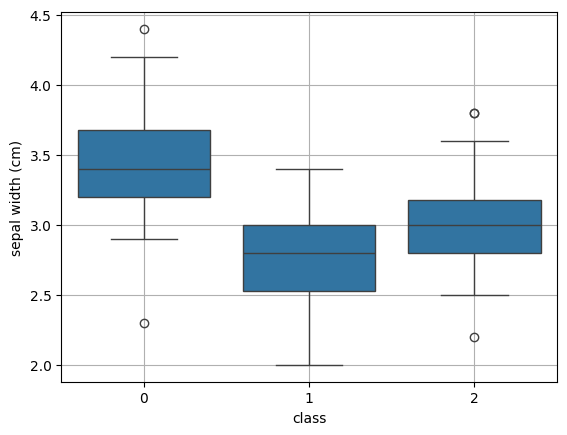

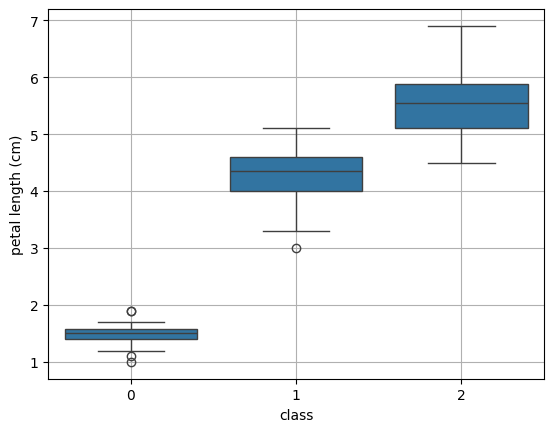

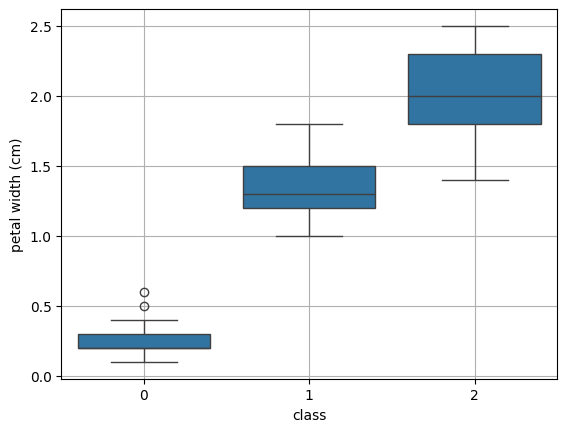

In [131]:
for colmn in df[colm_name]:
    plt.figure()
    sns.boxplot(data=df,x='class',y=df[colmn])
    plt.grid()
    plt.show()

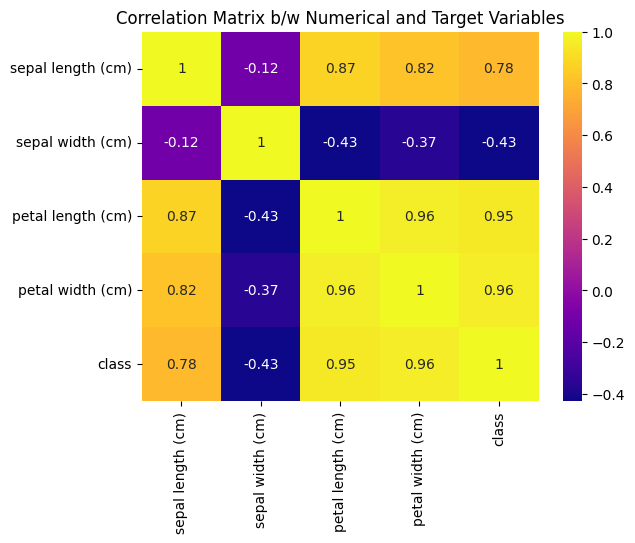

In [132]:
corr_matrix=df.corr()

sns.heatmap(corr_matrix,annot=True,cmap='plasma')
plt.title('Correlation Matrix b/w Numerical and Target Variables')
plt.show()

### Outlier Removal

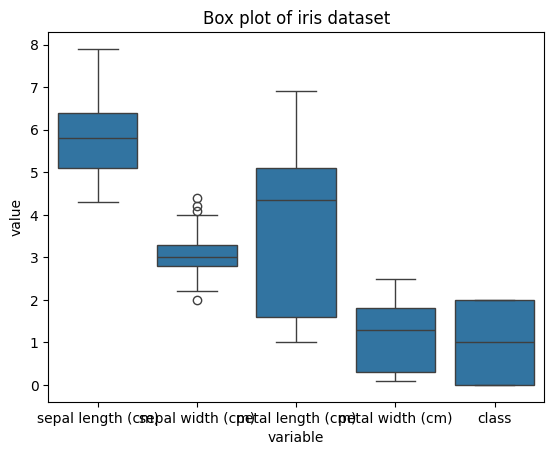

In [133]:
sns.boxplot(x='variable',y='value',data=pd.melt(df))

plt.title('Box plot of iris dataset')
plt.xlabel('variable')
plt.ylabel('value')
plt.show()

In [134]:
def whisker(colmn):
    q1,q3=np.percentile(colmn,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [135]:
#Removing outliers using capping
for i in df.select_dtypes(include='number').columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

In [ ]:
fig=plt.figure(figsize=(30,30))
counter=0

for colmn in df.select_dtypes(include= 'number').columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[colmn])
    plt.xlabel(colmn)
    counter=counter+1

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df[colm_name])

#covert scaled data to dataframe
scaled_df=pd.DataFrame(df_scaled, columns=colm_name)

df[colm_name]=scaled_df
df

### Model Fitting

In [ ]:
cleaned_df=df.drop('class',axis=1)
cleaned_df

### K-Means Clustering

#### Elbow Plot
It is difficult to find optimal value of K from many clusters using scatterplot.In this case we are using elbow plot to find K

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax=plt.plot(range(1,11),wcss,linewidth= 2,color='red',marker='8')
plt.axvline(x=3,ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of clusters (k)' )
plt.title('The Elbow Method')
plt.show()

##### It is clear, that the optimal number of clusters for our data are 3, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 3, it would be difficult to visualize the elbow if we choose the higher range.

In [ ]:
clustering_data=cleaned_df.iloc[:,[0,1,2,3]]
clustering_data.head()

In [ ]:
km=KMeans(n_clusters=3)
km.fit(clustering_data)

##### In a jupyter environment,please rerun this cell to show the HTML representationor trust the notebook

##### On GitHub,the HTML representation is unable to render,please try loading this page with nbviewer.org¶

In [ ]:
clusters=clustering_data.copy()
clusters['Cluster_Prediction']=km.fit_predict(clustering_data)
clusters.head()

In [ ]:
km.cluster_centers_

### Silhouette Coefficient
We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering. We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [ ]:
from sklearn.metrics import silhouette_score
s=[]
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(clustering_data)
    s.append(silhouette_score(clustering_data,km_pred))
s

##### *These are the silhouette scores for different values of K*

In [ ]:
silhouette_score(clustering_data,km_pred)

In [ ]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s,color='green')
plt.title('Silhouette Score vs Number of Cluster')

In [ ]:
optimalkmeans=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeansbest=optimalkmeans.fit_predict(clustering_data)

In [ ]:
silhouette_score(clustering_data, y_kmeansbest)

### Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as shc

### Dendrogram Visualization with scipy

In [ ]:
plt.figure(figsize=(18,6))
#Calculate linkage using Ward's method and create the dendrogram
dendro=shc.dendrogram(shc.linkage(clustering_data,method="ward"))
plt.title('Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

#### 1 Visual Inspection:
Examine the dendrogram to find notable jumps or gaps in the vertical lines. These indicate larger differences between clusters.

#### 2 Select the Threshold:
Choose a point where there is a significant gap in the vertical lines. This point serves as the threshold for drawing the horizontal line.

#### 3. Draw the Horizontal Line:
Draw a horizontal line at the chosen threshold.

#### 4. Count the Clusters:
The number of clusters is determined by counting how many vertical lines intersect the horizontal line you drew.

In [ ]:
plt.figure(figsize=(18,6))
dendro=shc.dendrogram(shc.linkage(clustering_data,method="ward"))
plt.hlines(y=4,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.5,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

                                  

### Agglomerative Clustering

In [ ]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
hc_pred=hc.fit_predict(clustering_data)
hc_pred

In [ ]:
cleaned_df['cluster']=hc_pred
cleaned_df.head()

In [ ]:
#Assuming 'cluster' is the column name containing cluster labels
df1=cleaned_df[cleaned_df['cluster'] ==0]
df2=cleaned_df[cleaned_df['cluster'] ==1]
df3=cleaned_df[cleaned_df['cluster']==2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

## Conclusion

*K Means Clustering:Silhouette Score:0.6213 K Means clustering achieved a relatively high silhouette score,indicating well-separated and compact clusters.This suggests that K Means clustering is effective in capturing the underlying structure of the Iris dataset.

*Hierarchical Clustering (Agglomerative):Silhouette Score: 0.3150 Hierarchical clustering,specifically Agglomerative Clustering,produced a lower silhouette score compared to K Means.While the score is positive,indicating some level of separation and cohesion within clusters,it is notably lower than that of K Means.